#Task 2
#The bit-flip code and the sign-flip code (you can find a description of both here) are two very simple
#circuits able to detect and fix the bit-flip and the sign-flip errors, respectively.

#Build the following simple circuit to prepare the Bell state 

#Now add, right before the CNOT gate and for each of the two qubits, an arbitrary “error gate”. 
#By error gate we mean that with a certain probability (that you can decide but must be non-zero 
#for all the choices) you have a 1 qubit unitary which can be either the identity, or the X gate
#(bit-flip error) or the Z gate (sign-flip error).

#Encode each of the two qubits with a sign-flip or a bit-flip code, in such a way that all the
#possible choices for the error gates described in 2), occurring on the logical qubits, can be 
#detected and fixed. Motivate your choice. This is the most non-trivial part of the problem, so do it with a lot of care!

#Test your solution by making many measurements over the final state and testing that the results
#are in line with the expectations.


In [8]:
# Importing Required Libraries
from qiskit import QuantumRegister
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,Aer
import numpy as np


In [9]:
#Phase Flip for one of the inputs of Bell state

def PhaseFlipOne(circuit,prob1):
    print('\nPhase Flip Code')
    print('----------------')

    #Encoding the Input
    circuit.cx(q[0],q[1])
    circuit.cx(q[0],q[2])

    circuit.h(q)
    circuit.rz(np.pi*2*prob1,q[0]) #Add this to simulate a phase flip error
    circuit.h(q)

    circuit.cx(q[0],q[1])
    circuit.cx(q[0],q[2])
 

    circuit.ccx(q[2],q[1],q[0])

      
    return circuit;

#Bit Flip for one of  the inputs of Bell state
def BitFlipOne(circuit,prob2):

    print('\nBit Flip Code')
    print('----------------')

    #Encoding the Input
    circuit.cx(q[3],q[4])
    circuit.cx(q[3],q[5])
    

    circuit.rx(np.pi*2*prob2,q[3])#Add this to simulate a bit flip error
    
 
    circuit.cx(q[3],q[4])
    circuit.cx(q[3],q[5])
 

    circuit.ccx(q[5],q[4],q[3])

    return circuit;

#Phase Flip for both the inputs of Bell state

def PhaseFlip(circuit,prob1):
    print('\nPhase Flip Code')
    print('----------------')

    #Encoding the Input
    circuit.cx(q[0],q[1])
    circuit.cx(q[0],q[2])
    circuit.cx(q[3],q[4])
    circuit.cx(q[3],q[5])

    circuit.h(q)
    circuit.rz(np.pi*2*prob1,q[0]) #Add this to simulate a phase flip error
    circuit.rz(np.pi*2*prob1,q[3]) #Add this to simulate a phase flip error
    circuit.h(q)

    circuit.cx(q[0],q[1])
    circuit.cx(q[0],q[2])
    circuit.cx(q[3],q[4])
    circuit.cx(q[3],q[5])

    circuit.ccx(q[2],q[1],q[0])
    circuit.ccx(q[5],q[4],q[3])

      
    return circuit;

#Bit Flip for both the inputs of Bell state
def BitFlip(circuit,prob2):

    print('\nBit Flip Code')
    print('----------------')
    #Encoding the Input
    circuit.cx(q[0],q[1])
    circuit.cx(q[0],q[2])
    circuit.cx(q[3],q[4])
    circuit.cx(q[3],q[5])
    

    circuit.rx(np.pi*2*prob2,q[0]) #Add this to simulate a bit flip error
    circuit.rx(np.pi*2*prob2,q[3])
    
    circuit.cx(q[0],q[1])
    circuit.cx(q[0],q[2])
    circuit.cx(q[3],q[4])
    circuit.cx(q[3],q[5])
 
    circuit.ccx(q[2],q[1],q[0])
    circuit.ccx(q[5],q[4],q[3])

    return circuit;

#Phase Flip for First Input and Bit Flip for Second Input
def Phase_Bit_Flip(circuit,prob1,prob2):
    print('\n Phase_Bit Flip Code_ Phase Flip for First Input and Bit Flip for Second Input :')
    print('----------------')
    #Encoding the Input
    circuit.cx(q[0],q[1])
    circuit.cx(q[0],q[2])
    circuit.cx(q[3],q[4])
    circuit.cx(q[3],q[5])
    
    circuit.h(q[0:3])
    circuit.rz(np.pi*2*prob1,q[0]) #Add this to simulate a phase flip error
    circuit.rx(np.pi*2*prob2,q[3]) #Add this to simulate a bit flip error
    circuit.h(q[0:3])
    
    circuit.cx(q[0],q[1])
    circuit.cx(q[0],q[2])
    circuit.cx(q[3],q[4])
    circuit.cx(q[3],q[5])
 
    circuit.ccx(q[2],q[1],q[0])
    circuit.ccx(q[5],q[4],q[3])
    
    return circuit;

#Bit Flip for First Input and Phase Flip for Second Input
def Bit_Phase_Flip(circuit,prob1,prob2):
    print('\n Bit_Phase Flip Code_ Bit Flip for First Input and Phase Flip for Second Input :')
    print('----------------')
    #Encoding the Input
    circuit.cx(q[0],q[1])
    circuit.cx(q[0],q[2])
    circuit.cx(q[3],q[4])
    circuit.cx(q[3],q[5])
    
    circuit.h(q[0:3])
    circuit.rx(np.pi*2*prob1,q[0]) #Add this to simulate a phase flip error
    circuit.rz(np.pi*2*prob2,q[3]) #Add this to simulate a bit flip error
    circuit.h(q[0:3])
    
    circuit.cx(q[0],q[1])
    circuit.cx(q[0],q[2])
    circuit.cx(q[3],q[4])
    circuit.cx(q[3],q[5])
 
    circuit.ccx(q[2],q[1],q[0])
    circuit.ccx(q[5],q[4],q[3])
    
    return circuit;


In [10]:
#####################################################
#Main Program
#####################################################    
#Declaring Circuit

q = QuantumRegister(6,'q')
c = ClassicalRegister(2,'c')

circuit = QuantumCircuit(q,c)
circuit.h(q[0])

print("Select the Option for Error to be introduced in the Bell State" )
print("1. Phase Flip for one of the Inputs")
print("2. Bit Flip for one of the Inputs")
print("3. Phase Flip for both Inputs")
print("4. Bit Flip for both Inputs")
print("5. Phase Flip for First Input and Bit Flip for Second Input")
print("6. Bit Flip for First Input and Phase Flip for Second Input")
option=int(input())

if   option==1:
     print("Enter Probability for Phase Flip of one Input")
     prob1=round(float(input()),2)
     PhaseFlipOne(circuit,prob1) 
     ops="One Input Phase"
elif option==2:
     print("Enter Probability for Bit Flip of one Input")
     prob1=round(float(input()),2)
     BitFlipOne(circuit,prob1) 
     ops="One Input Bit"
elif option ==3:
     print("Enter Probability for Phase Flip")
     prob1=round(float(input()),2)
     PhaseFlip(circuit,prob1) 
     ops="Both Input Phase"
elif option==4:
     print("Enter Probability for Bit Flip")
     prob2=round(float(input()),2)
     BitFlip(circuit,prob2)
     ops="Both Input Bit"
elif option==5:
     print("Enter Probability for Phase Flip")
     prob1=round(float(input()),2)
     print("Enter Probability for Bit Flip")
     prob2=round(float(input()),2)
     Phase_Bit_Flip(circuit,prob1,prob2)
     ops="Phase & Bit"
elif option==6:
     print("Enter Probability for Bit Flip")
     prob1=round(float(input()),2)
     print("Enter Probability for Phase Flip")
     prob2=round(float(input()),2)
     Bit_Phase_Flip(circuit,prob1,prob2)
     ops="Bit & Phase"
else: 
     print("\nWrong Option") 
     
##Entangling both inputs 
circuit.cx(q[0],q[3])

circuit.measure(q[0],c[0])
circuit.measure(q[3],c[1])

Select the Option for Error to be introduced in the Bell State
1. Phase Flip for one of the Inputs
2. Bit Flip for one of the Inputs
3. Phase Flip for both Inputs
4. Bit Flip for both Inputs
5. Phase Flip for First Input and Bit Flip for Second Input
6. Bit Flip for First Input and Phase Flip for Second Input
1
Enter Probability for Phase Flip of one Input
0.5

Phase Flip Code
----------------


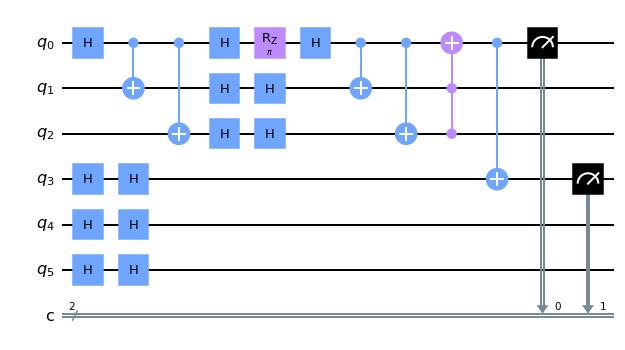

In [11]:
#Graphical Representation of  Circuit
circuit.draw(output='mpl')

In [12]:
#Executing the circuit on simulator 

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=1000)
counts = job.result().get_counts()

print("\n"+ str(ops) + " flip code with error detection & mitigation")
print("----------------------")
print(counts)


One Input Phase flip code with error detection & mitigation
----------------------
{'00': 489, '11': 511}
